# CSTAT Lab 3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, probplot

In [3]:
df = pd.read_pickle("tpg_data.zip")
df.head()

,Date,Ligne,Ligne Type,Jour Semaine,Horaire Type,Arrêt,Arrêt Code Long,Indice Semaine,Indice Jour Semaine,Nombre de Montées,Nombre de Descentes,Mois Annee
0,2024-12-03,1,PRINCIPAL,2-Mardi,NORMAL,Belle-Idée-Centre,BLID00,49,2,118.05,5.06,2024-12
1,2024-12-03,1,PRINCIPAL,2-Mardi,NORMAL,Belle-Idée-Réception,BISA01,49,2,3.96,70.58,2024-12
2,2024-12-03,1,PRINCIPAL,2-Mardi,NORMAL,Ch. de l'Eperon,CEPR99,49,2,349.06,111.60,2024-12
3,2024-12-03,1,PRINCIPAL,2-Mardi,NORMAL,"Chêne-Bougeries, Gradelle",GRDL01,49,2,277.34,83.78,2024-12
4,2024-12-03,1,PRINCIPAL,2-Mardi,NORMAL,Cirque,CIRQ00,49,2,695.15,677.48,2024-12


## Computing a Linear regression

Let's see how reliable our data is. To do this, we'll check that the number of people getting on a vehicle is the same as the number of people getting off.

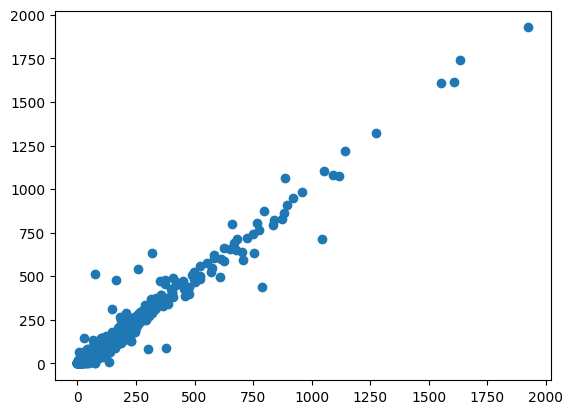

In [4]:
mvmt = df.groupby('Arrêt')[['Nombre de Descentes', 'Nombre de Montées']].agg('mean')
plt.scatter(mvmt['Nombre de Descentes'], mvmt['Nombre de Montées'])

Compute the slope and intercept (a & b) to estimate a linear relationship in our data.

In [5]:
X = mvmt['Nombre de Descentes']
y = mvmt['Nombre de Montées']

X_mean = mvmt['Nombre de Descentes'].mean()
y_mean = mvmt['Nombre de Montées'].mean()

# Calculate covariance(X, y) and variance(X)
covariance_xy = np.sum((X - X_mean) * (y - y_mean))
variance_x = np.sum((X - X_mean) ** 2)

# Least squares estimators
a = covariance_xy / variance_x  # Slope
b = y_mean - a * X_mean  # Intercept

In [6]:
def line(x):
    return line.a * x + line.b

In [7]:
line.a = a
line.b = b

In [8]:
a

0.9960328162517421

In [9]:
b

-0.9888749784641817

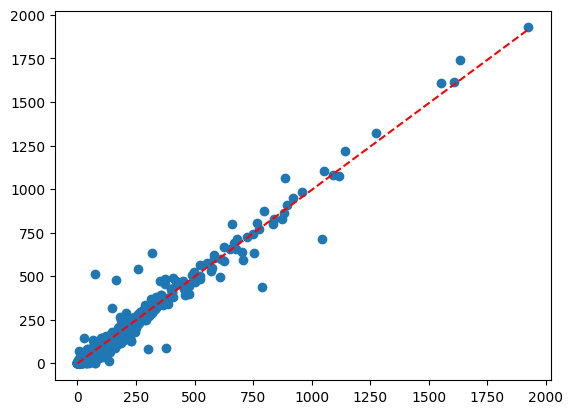

In [7]:
plt.scatter(mvmt['Nombre de Descentes'], mvmt['Nombre de Montées'])
plt.plot((X.min(), X.max()), (line(X.min()), line(X.max())), "r--")

Now, let's compute the confidence interval for our estimators. We'll use a 99% confidence.

mse

In [8]:
mse = np.sum((line(X) - y)**2) / (len(y) - 2)

interval a

In [9]:
t.ppf(0.75 / 2, len(X)) * np.sqrt(mse / np.sum((X - X_mean)**2) )

-0.001962984562193217

interval b

In [10]:
t.ppf(0.75 / 2, len(X) - 2) * np.sqrt(mse / len(X) )

-0.409592342799517

What can we conclude ?

In theory, we would have the same number of people getting on and off, which means the linear estimation should be $a=1$ and $b=0$. These values are within our 99% confidence interval, so our data is trustworthy.

## Sanity check

What are the assumtption we used ?

 - The mean of the responses, $\mathbb E(Y_i)$, is a **L**inear function of the $x_i$.
 - The errors, $\varepsilon_i$, and hence the responses $Y_i$, are **I**ndependent.
 - The errors, $\varepsilon_i$, and hence the responses $Y_i$, are **N**ormally distributed.
 - The errors, $\varepsilon_i$, and hence the responses $Y_i$, have **E**qual variances ($\sigma^2$) for all $x$ values.

### QQ Plot (Quantile-Quantile Plot)
A QQ plot compares the quantiles of residuals to a theoretical normal distribution. If the residuals are normally distributed, the points should lie along a 45-degree reference line. Deviations, especially at the tails, indicate skewness or heavy-tailed residuals, suggesting a potential violation of the normality assumption.

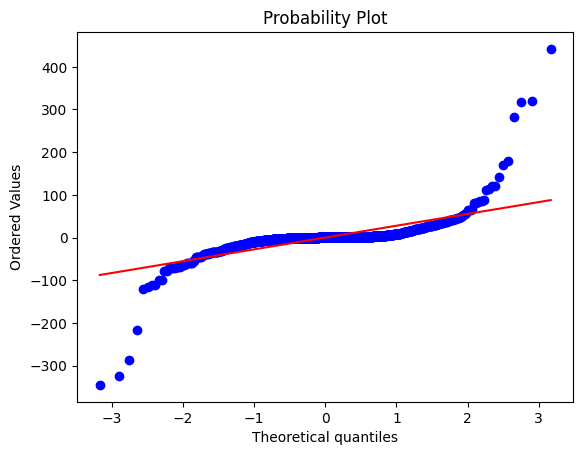

In [11]:
y_pred = line(X)
residuals = y - y_pred

# Q-Q Plot
probplot(residuals, dist="norm", plot=plt)
plt.show()

### Residuals vs. Fitted Values
This plot helps assess whether the residuals (errors) exhibit patterns that suggest a poor model fit. Ideally, residuals should be randomly scattered around zero, indicating that the model captures the relationship well. If a clear pattern emerges, such as a curved shape, it may indicate non-linearity, while a funnel-like shape suggests heteroscedasticity (unequal variance of errors).

Text(0.5, 1.0, 'Residuals vs. Fitted Values')

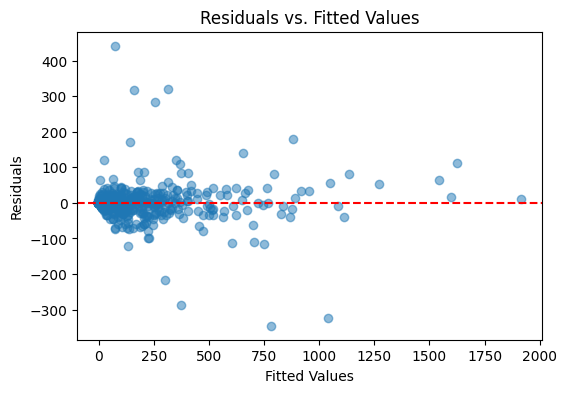

In [12]:
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")

### Histogram of Residuals
A histogram or density plot of residuals checks whether they follow a normal distribution, which is an assumption for valid hypothesis testing in linear regression. If the residuals resemble a bell-shaped curve, the normality assumption holds. Skewed or multi-peaked distributions suggest the presence of outliers or missing variables in the model.

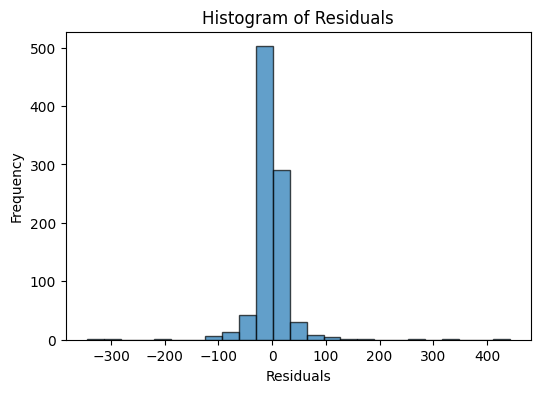

In [13]:
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=25, edgecolor='black', alpha=0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

### Residuals vs. X 
This plot checks if residuals are randomly scattered around zero for a given predictor $X$. Patterns suggest issues like non-linearity (need for transformation), omitted variables, or heteroscedasticity (changing variance). Ideally, residuals should show no clear trend, indicating a well-fitted linear model.

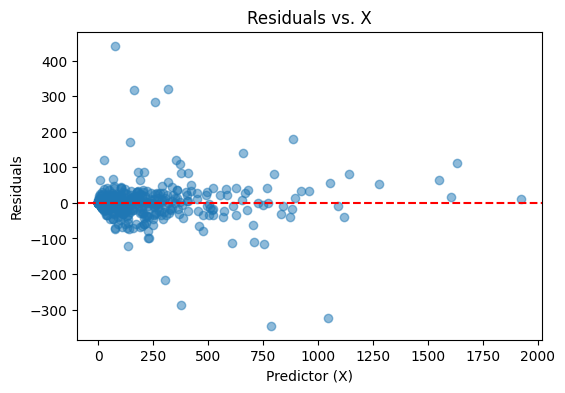

In [15]:
plt.figure(figsize=(6, 4))
plt.scatter(X, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predictor (X)")
plt.ylabel("Residuals")
plt.title("Residuals vs. X")
plt.show()

## (Bonus) Another example

Let's now look at the cumulated number of passenger throughout the year, try to reproduce a Linear estimation for these data.

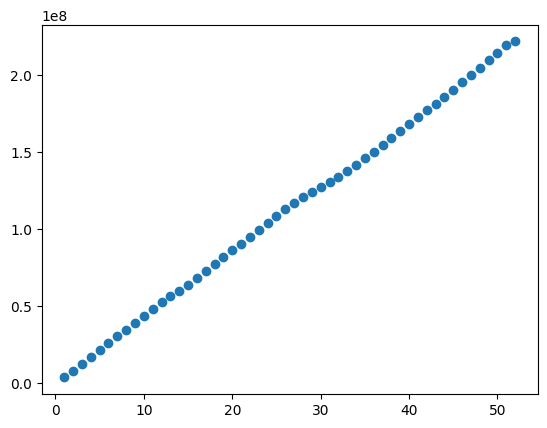

In [16]:
mvmt = df.groupby('Indice Semaine')[['Nombre de Montées']].agg('sum').agg('cumsum')
plt.scatter(mvmt.index, mvmt['Nombre de Montées'])